In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

from pathlib import Path

import numpy as np
from parse import parse

In [2]:
class Robot:
    def __init__(self, px, py, vx, vy):
        self.start_pos = (px, py)
        self.velocity = (vx, vy)

    def step(self, grid_width, grid_height, time):
        x = self.start_pos[0] + self.velocity[0] * time
        y = self.start_pos[1] + self.velocity[1] * time
        return (x % grid_width, y % grid_height)

In [3]:
class Puzzle:
    def __init__(self, grid_width, grid_height):
        self.grid_width = grid_width
        self.grid_height = grid_height
        self.robots = []

    def load_robots(self, input_text):
        for line in input_text.splitlines():
            px, py, vx, vy = parse("p={:d},{:d} v={:d},{:d}", line)
            self.robots.append(Robot(px, py, vx, vy))

    def get_view(self, time):
        view = np.zeros((self.grid_width, self.grid_height), dtype=np.int8)
        for r in self.robots:
            pos = r.step(self.grid_width, self.grid_height, time)
            view[pos] += 1
        return view

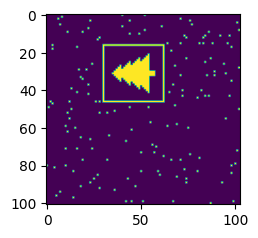

In [4]:
my_input = Path("input.txt").read_text().strip()
puzzle = Puzzle(101, 103)
puzzle.load_robots(my_input)
view = puzzle.get_view(8087)  # from part2.py

fig = plt.figure(figsize=(2.5, 2.5))
ax = fig.gca()
ax.imshow(view)

In [5]:
plt.savefig("tree.png", bbox_inches="tight")

<Figure size 640x480 with 0 Axes>